Import data from csv

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


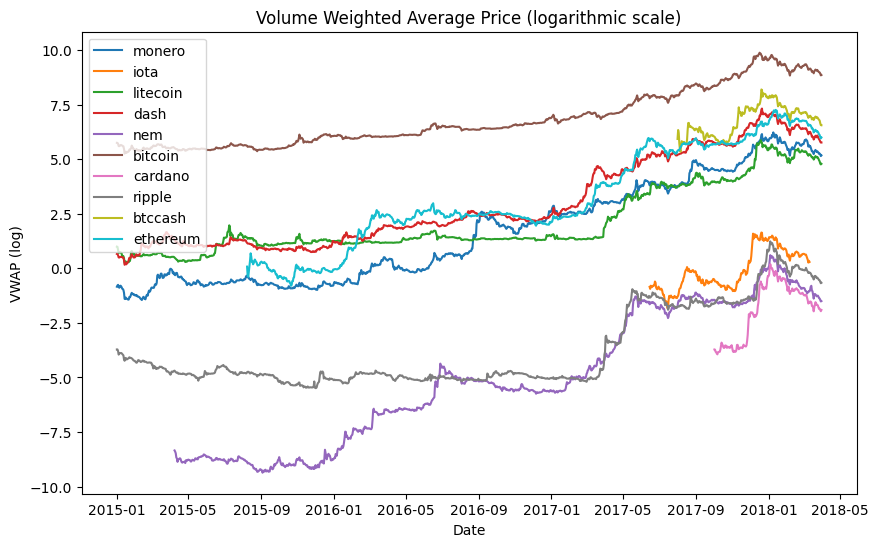

In [3]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt

# Obtener la lista de archivos en la carpeta "archive"
files_list = os.listdir("archive")

# Crear una lista para almacenar los dataframes
currencies_list = []

# Leer cada archivo y agregar el dataframe a la lista
for file_name in files_list:
    df = pd.read_csv(os.path.join("archive", file_name))
    df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
    currencies_list.append(df)

# Renombrar los dataframes en la lista
currencies_list = {file_name.replace("_usd_gwa.csv", ""): df for file_name, df in zip(files_list, currencies_list)}

# Crear el gráfico
plt.figure(figsize=(10, 6))
for currency, df in currencies_list.items():
    plt.plot(df["Date"], df["VWAP"].apply(lambda x: math.log(x)), label=currency)

plt.title("Volume Weighted Average Price (logarithmic scale)")
plt.xlabel("Date")
plt.ylabel("VWAP (log)")
plt.legend()
plt.show()
